<a href="https://colab.research.google.com/github/preritt/535/blob/master/Work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

# Due Date: October 21, 2019

# Name: Nikoo Karbassi

## Import required Python packages


In [0]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Pima Indians Diabetes Database

We will use diabetes dataset from UCI machine learning repository. Detail of this data can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The objective of the dataset is to  predict whether or not a female patient has diabetes based on certain diagnostic measurements included in the dataset.

The dataset consists of several medical predictor (features) variables and one target variable indicating if the person has diabetes. Predictor variables include the number of pregnancies the patient has had,  glucose level, blood pressure, skin, insulin, bmi, pedigree and age.

## Loading the dataset

In [0]:
# These are the names of column in the dataset. It includes all features of the data and the label.
col_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
diabetes_data = pd.read_csv("diabetes.csv", header=1, names=col_names)

In [0]:
# Display the first five instances in the dataset
diabetes_data.head(5)

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### Use `describe` function to display some statistics of the data. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for details about this function.

In [0]:
# Display some statistics of the data
diabetes_data.describe()

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Separating the target label and features of the data
You can access columns of the data either using a `list` with names of columns or using `.` notation. This has been done for you. 

In [0]:
#split dataset into features and target variable
feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.label # Target variable

## Splitting the data

We will split the dataset into training and validation set. Generally in machine learning, we split the data into training,
validation and test set (this will be covered in later chapters). The model with best performance on the validation set is used to evaluate perfromance on 
the test set which is the unseen data. In this assignment, we will using `train set` for training and evaluate the performance on `validation set` for various 
model configurations to determine the best hyperparameters (parameter setting which yields best performance).

Use `sklearn's` inbuilt function `train_test_split` to split the data. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for further details. This section has been done for you. We use 80% of the data for training and 20% of the data for validation.

In [0]:
# Split dataset into training set and test set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% validation

## Build the Decision Tree for identifying if the person has diabetes

Use `sklearn's` `DecisionTreeClassifier` to build the decision tree. See [here](https://scikit-learn.org/stable/modules/tree.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more details.

In [0]:
# Create Decision Tree classifer (use default parameters for decision tree classifier - do not pass any arguments) 
#TODO
clf =  DecisionTreeClassifier() # clf = classifier. This is a model. In this case we are using the Decision Tree Model/Classifier
    # can specify the criterion for the DecisionTreeClassifier by DecisionTreeClassifier(criterion = "entropy")
    # The criterion is automatically set to criterion = "gini" though.

# Train Decision Tree Classifer on train set
#TODO
clf = clf.fit(X_train, y_train)

#Predict the response for train set
#TODO
y_pred_train = clf.predict(X_train) # Plug in values here!!

#Predict the response for validation set
#TODO
y_pred_validation = clf.predict(X_validation) # Plug in values here!!!

# Performance Evaluation 
## What is the classification accuracy of the decision tree on train and validation data ?

Note: You can use `accuracy_score` as described [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to evaluate performance.

In [0]:
from sklearn.metrics import accuracy_score
# Compute accuracy on the training set
#TODO
accuracy_score(y_train, y_pred_train)

1.0

In [0]:
# Compute accuracy on the validation set
#TODO
accuracy_score(y_validation, y_pred_validation)

# The classification accuracy of the decision tree on the train set is 1.
# The classification accuracy of the decision tree on the validation set is 0.707.

0.7272727272727273

## Now we will tune the parameters of decision tree to further enhance the accuracy of the classifier.
 By default, `DecisionTreeClassifier` will overfit on the training data due to large tree depth resulting in poor generalization. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) under ``max_depth`` for explaination. 

#### In the folllowing exercises, we will reduce the depth of tree to improve generalization and use `information gain` and `gini` as the criteria to decide which feature to use for splitting.

#### Create tree with maximum depth of 3 and `gini` criterion for splitting by specifying `max_depth = 3` in the  classifier. Note - by default the classifier uses `gini` as the splitting criterion, so you do not need to specify it explicitly.

In [0]:
# Create Decision Tree classifer with max depth of 3
#TODO
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

# Train Decision Tree Classifer
#TODO
clf = clf.fit(X_train, y_train)

#Predict the response for train dataset
#TODO
y_pred_train = clf.predict(X_train)

#Predict the response for validation dataset
#TODO
y_pred_validation = clf.predict(X_validation)

## What is the classification accuracy of the decision tree on train and validation set ?

---



In [0]:
# Compute accuracy on the training set
#TODO
accuracy_score(y_train, y_pred_train)

0.7814029363784666

In [0]:
# Compute accuracy on the validation set
accuracy_score(y_validation, y_pred_validation)#TODO

# The classification accuracy of the decision tree on the train set is 0.781.
# The classification accuracy of the decision tree on the validation set is 0.759.

0.7597402597402597

#### Has the accuracy on validation set improved? Provide a brief explaination.

In [0]:
#TODO
# Yes, the accuracy on the validation set has improved from 0.746 to 0.759. This
# is likely because the new classifier does not overfit the training data and 
# thus can be more accurately generalized to the validation data.

## Visualize the decision tree

Use Scikit-learn's export_graphviz function to display the tree within a Jupyter notebook.
For plotting tree, you also need to install graphviz and pydotplus. 
Install these libraries in Anaconda:

`pip install graphviz`

`pip install pydotplus`

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.


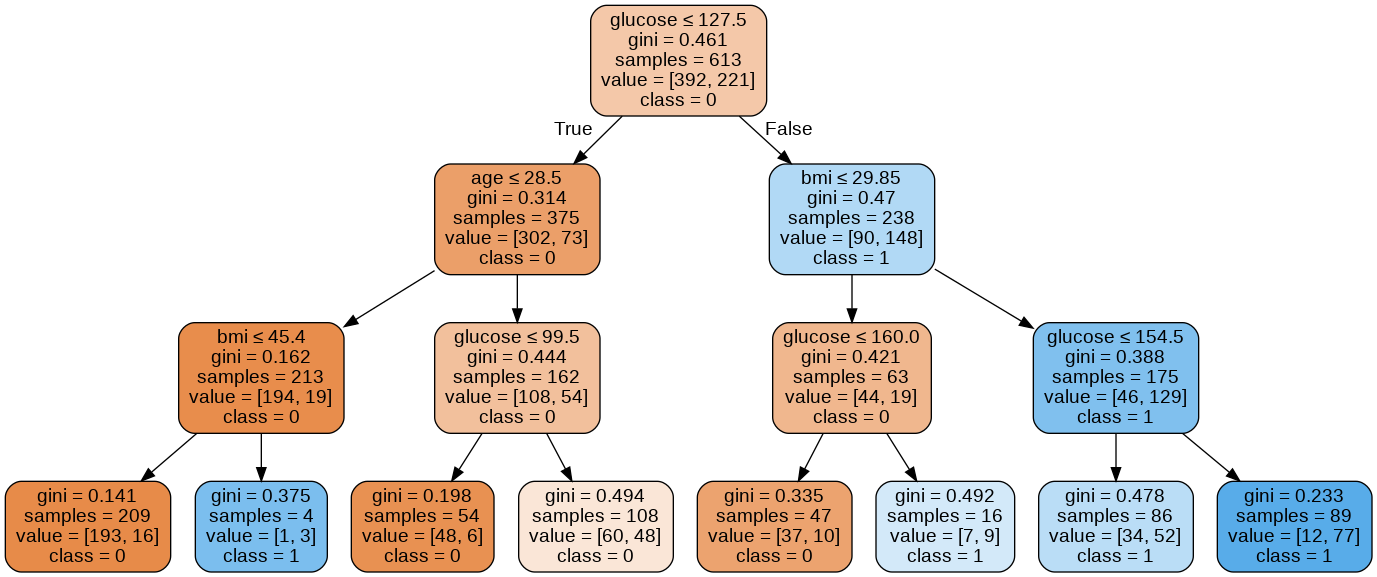

In [0]:
# You do not need to modify anything here - just run the cell to visualize the tree.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [0]:
X.head()

,pregnancies,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201


In [0]:
def rules_relabel(row):
    if row['glucose'] <=127.5 and row['age'] <= 28.5 and row['bmi'] <=45.4:
        class_label = 0
    elif row['glucose'] <=127.5 and row['age'] <= 28.5 and row['bmi'] >45.4:
        class_label = 1
    elif row['glucose'] <=127.5 and row['age'] >= 28.5 and row['glucose'] <= 99.5:
        class_label = 2      
    elif row['glucose'] <=127.5 and row['age'] >= 28.5 and row['glucose'] > 99.5:
        class_label = 3 
    elif row['glucose'] >=127.5 and row['bmi'] <= 29.85 and row['glucose'] <= 160.:
        class_label = 4 
    elif row['glucose'] >=127.5 and row['bmi'] <= 29.85 and row['glucose'] > 160.:
        class_label = 5
    elif row['glucose'] >=127.5 and row['bmi'] >= 29.85 and row['glucose'] <= 154.5:
        class_label = 6 
    elif row['glucose'] >=127.5 and row['bmi'] >= 29.85 and row['glucose'] > 154.5:
        class_label = 7
    else:
        class_label = 100
    return class_label

In [0]:
import pandas as pd

In [0]:
copied_Data = X.copy()

In [0]:
copied_Data['relabeled_data'] = copied_Data.apply(rules_relabel, axis=1)

In [0]:
copied_Data.describe()

,pregnancies,insulin,bmi,age,glucose,bp,pedigree,relabeled_data
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,79.903520,31.990482,33.219035,120.859192,69.101695,0.471674,2.920469
std,3.370877,115.283105,7.889091,11.752296,31.978468,19.368155,0.331497,2.602506
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,0.000000,27.300000,24.000000,99.000000,62.000000,0.243500,0.000000
50%,3.000000,32.000000,32.000000,29.000000,117.000000,72.000000,0.371000,3.000000
75%,6.000000,127.500000,36.600000,41.000000,140.000000,80.000000,0.625000,6.000000
max,17.000000,846.000000,67.100000,81.000000,199.000000,122.000000,2.420000,7.000000


In [0]:
copied_Data.head()

,pregnancies,insulin,bmi,age,glucose,bp,pedigree,relabeled_data
0,1,0,26.6,31,85,66,0.351,2
1,8,0,23.3,32,183,64,0.672,5
2,1,94,28.1,21,89,66,0.167,0
3,0,168,43.1,33,137,40,2.288,6
4,5,0,25.6,30,116,74,0.201,3


In [0]:
feature_cols = ['glucose','age','bmi]

In [0]:
subset_data_X = copied_Data[['glucose','age','bmi']]

In [0]:
subset_data_X.head()

,glucose,age,bmi
0,85,31,26.6
1,183,32,23.3
2,89,21,28.1
3,137,33,43.1
4,116,30,25.6


In [0]:
subset_data_Y = copied_Data[['relabeled_data']]

In [0]:
subset_data_Y.head()

,relabeled_data
0,2
1,5
2,0
3,6
4,3


In [0]:
# Split dataset into training set and test set
X_train, X_validation, y_train, y_validation = train_test_split(subset_data_X, subset_data_Y, test_size=0.2, random_state=1) # 80% training and 20% validation

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam, sgd, rmsprop
from keras.layers import concatenate
import keras
from keras.utils import plot_model

In [0]:
inputGlucose = Input(shape=(1,), name='Glucose')
inputAge = Input(shape=(1,), name='Age')
inputBmi = Input(shape=(1,), name='BMI')

In [0]:
# the first branch operates on the first input
w1_glucose = Dense(1, activation="relu", name = 'w1_glucose')(inputGlucose)
w2_glucose = Dense(1, activation="relu", name = 'w2_glucose')(inputGlucose)

w1_age = Dense(1, activation="relu")(inputAge)
w2_age = Dense(1, activation="relu")(inputAge)


add_w1_glucose_w1_age = keras.layers.Add()([w1_glucose, w1_age])

w1_bmi = Dense(1, activation="relu")(inputBmi)
w2_bmi = Dense(1, activation="relu")(inputBmi)

add_w1_bmi_add_w1_glucose_w1_age = keras.layers.Add()([add_w1_glucose_w1_age, w1_bmi]) # Output Class 0
add_w2_bmi_add_w1_glucose_w1_age = keras.layers.Add()([add_w1_glucose_w1_age, w2_bmi]) # Output Class 1


w3_glucose = Dense(1, activation="relu")(inputGlucose)
w4_glucose = Dense(1, activation="relu")(inputGlucose)

add_w1_glucose_w2_age = keras.layers.Add()([w1_glucose, w2_age])
add_w3_glucose_add_w1_glucose_w1_age = keras.layers.Add()([w3_glucose, add_w1_glucose_w2_age]) # Output Class 2
add_w4_glucose_add_w1_glucose_w1_age = keras.layers.Add()([w4_glucose, add_w1_glucose_w2_age]) # Output Class 3

add_w1_bmi_w2_glucose = keras.layers.Add()([w1_bmi, w2_glucose])
add_w2_bmi_w2_glucose = keras.layers.Add()([w2_bmi, w2_glucose])

w5_glucose = Dense(1, activation="relu")(inputGlucose)
w6_glucose = Dense(1, activation="relu")(inputGlucose)

add_w5_glucose_add_w1_bmi_w2_glucose = keras.layers.Add()([w5_glucose, add_w1_bmi_w2_glucose]) # Output Class 4
add_w6_glucose_add_w1_bmi_w2_glucose = keras.layers.Add()([w6_glucose, add_w1_bmi_w2_glucose]) # Output Class 5

w7_glucose = Dense(1, activation="relu")(inputGlucose)
w8_glucose = Dense(1, activation="relu")(inputGlucose)

add_w7_glucose_add_w2_bmi_w2_glucose = keras.layers.Add()([w7_glucose, add_w2_bmi_w2_glucose]) # Output Class 6
add_w8_glucose_add_w2_bmi_w2_glucose = keras.layers.Add()([w8_glucose, add_w2_bmi_w2_glucose]) # Output Class 7

logits = concatenate([add_w1_bmi_add_w1_glucose_w1_age,
                      add_w2_bmi_add_w1_glucose_w1_age,
                      add_w3_glucose_add_w1_glucose_w1_age,
                      add_w4_glucose_add_w1_glucose_w1_age,
                      add_w5_glucose_add_w1_bmi_w2_glucose,
                      add_w6_glucose_add_w1_bmi_w2_glucose,
                      add_w7_glucose_add_w2_bmi_w2_glucose,
                      add_w8_glucose_add_w2_bmi_w2_glucose],axis = 1)

all_inputs = [inputGlucose, inputAge, inputBmi]

model = keras.models.Model(inputs=all_inputs, outputs=logits)

# concat_w1_age_w1_glucose = keras.layers.Add()([w1_glucose1, w1_age])
# concat_w2_age_w1_glucose = keras.layers.Add()([w1_glucose1, w2_age])

# w1_bm1 = Dense(1, activation="relu")(inputBmi)
# w2_bm1 = Dense(1, activation="relu")(inputBmi)

# concat_w1_age_w1_glucose_w1_bmi = keras.layers.Add()([concat_w1_age_w1_glucose, w1_bm1]) # output class 0
# concat_w1_age_w1_glucose_w2_bmi = keras.layers.Add()([concat_w1_age_w1_glucose, w2_bm1])  # output class 1

# w3_glucose = Dense(1, activation="relu")(inputGlucose)
# w4_glucose = Dense(1, activation="relu")(inputGlucose)

# concat_w2_age_w2_glucose_w3_glucose = keras.layers.Add()([concat_w2_age_w2_glucose, w3_glucose]) # output class 2
# concat_w2_age_w2_glucose_w4_glucose = keras.layers.Add()([concat_w2_age_w2_glucose, w4_glucose])  # output class 3




# x = Dense(4, activation="relu")(x)
# x = Model(inputs=inputA, outputs=x)
 
# # the second branch opreates on the second input
# y = Dense(64, activation="relu")(inputB)
# y = Dense(32, activation="relu")(y)
# y = Dense(4, activation="relu")(y)
# y = Model(inputs=inputB, outputs=y)

In [0]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Glucose (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Age (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
BMI (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
w1_glucose (Dense)              (None, 1)            2           Glucose[0][0]                    
____________________________________________________________________________________________

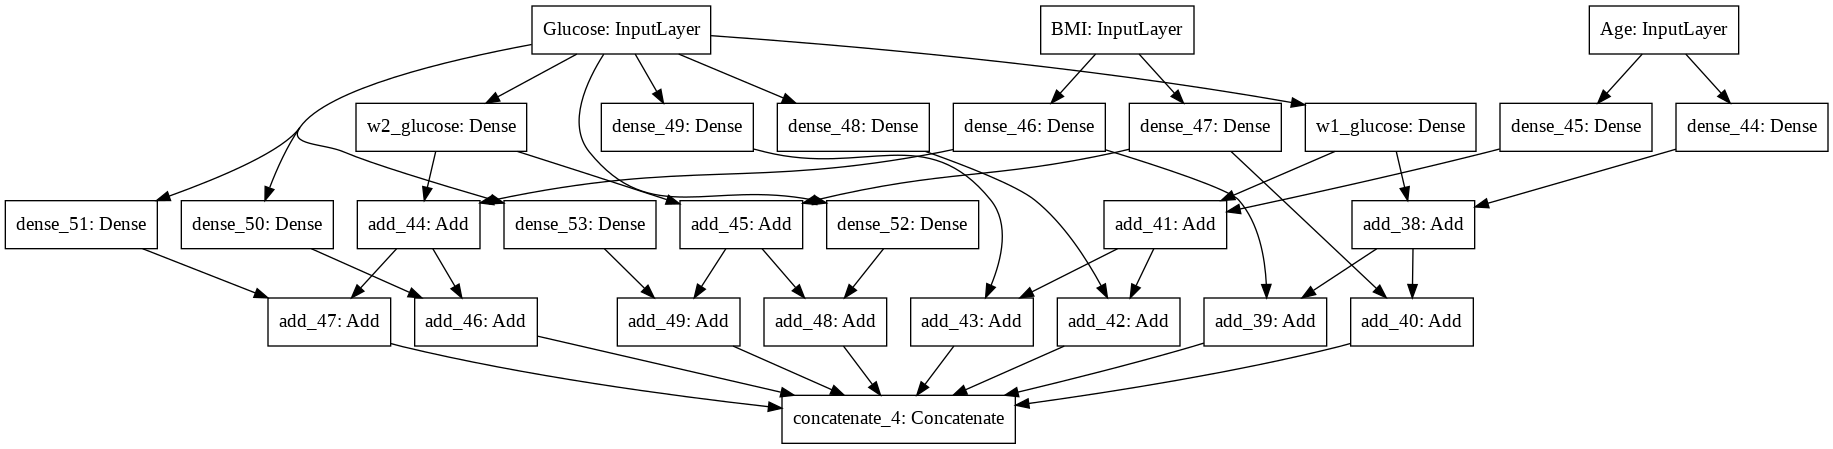

In [0]:
plot_model(model, to_file='model.png')

In [0]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')

In [0]:
model.compile(
            optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

In [0]:
y_train



,relabeled_data
662,6
711,6
161,0
509,2
305,5
...,...
645,5
715,7
72,6
235,7


In [0]:
X_train

,glucose,age,bmi
662,145,40,37.9
711,129,38,41.2
161,114,27,44.2
509,84,46,29.7
305,161,47,25.5
...,...,...,...
645,167,33,23.4
715,173,31,33.8
72,129,23,35.1
235,181,51,35.9


In [0]:
X_train.glucose

662    145
711    129
161    114
509     84
305    161
      ... 
645    167
715    173
72     129
235    181
37      90
Name: glucose, Length: 613, dtype: int64

In [0]:
X_train.glucose.values

array([145, 129, 114,  84, 161, 181, 166, 123,  95, 152, 104, 134, 125,
       146, 165, 187, 181, 123, 165, 180,  84,  91, 172,  82,  81, 118,
       128, 133, 145, 122, 146,  95, 119, 124, 111, 128, 129, 114,  99,
       196, 130, 176, 103, 193, 125, 109, 170, 102, 102, 105, 100, 105,
       162, 101, 122,  98,  90,  83, 103, 112,  79,  72, 101,  85, 115,
        77, 131,  99, 139, 146, 119, 129, 139, 108,  91, 139, 151, 107,
       120,  84, 147,  85, 143, 111, 147,  68, 175, 116,  95, 120,  87,
        75, 115, 107, 130,  99, 103,  88, 124, 139, 108, 100, 112, 122,
        78, 100,  92, 140,  78, 123,  99, 133, 141, 104, 111,  99, 110,
       117, 124, 108, 109,  73,  86, 103, 106, 117, 116, 111, 150, 148,
        74,  97, 191, 110, 130, 114, 124,  87,  84, 112, 161,  99,  78,
       109, 181, 183, 124,  95,  91, 173,  96, 111,  80, 139,  80, 100,
        95,  88, 180, 116, 122, 158, 129, 126, 163, 136, 100, 179, 105,
       141, 116, 169, 154, 167,  76, 128, 143,  97, 142, 141, 14

In [0]:
model.fit(x = [X_train.glucose.values, X_train.age.values, X_train.bmi.values], y = y_train.values, batch_size=32, epochs=1000)

Epoch 1/1000
613/613 [==============================] - 1s 1ms/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 2/1000
613/613 [==============================] - 0s 56us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 3/1000
613/613 [==============================] - 0s 60us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 4/1000
613/613 [==============================] - 0s 60us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 5/1000
613/613 [==============================] - 0s 55us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 6/1000
613/613 [==============================] - 0s 64us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 7/1000
613/613 [==============================] - 0s 64us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 8/1000
613/613 [==============================] - 0s 58us/step - loss: 4.2067 - sparse_categorical_accuracy: 0.1794
Epoch 9/1000
613/613 [===

KeyboardInterrupt: ignored

# Train simple NN

In [0]:
from keras.models import Sequential

In [0]:
inputGlucose = Input(shape=(3,), name='ThreeInputs')


In [0]:
# the first branch operates on the first input
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))


In [0]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')
model.compile(
            optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [0]:
X_train.glucose

662    145
711    129
161    114
509     84
305    161
      ... 
645    167
715    173
72     129
235    181
37      90
Name: glucose, Length: 613, dtype: int64

In [0]:
model.fit(x = X_train.values, y = y_train.values, batch_size=32, epochs=1000)

Epoch 1/1000
613/613 [==============================] - 1s 1ms/step - loss: 2.0887 - acc: 0.7781
Epoch 2/1000
613/613 [==============================] - 0s 53us/step - loss: 1.8359 - acc: 0.8238
Epoch 3/1000
613/613 [==============================] - 0s 52us/step - loss: 1.8843 - acc: 0.8091
Epoch 4/1000
613/613 [==============================] - 0s 54us/step - loss: 1.8293 - acc: 0.8401
Epoch 5/1000
613/613 [==============================] - 0s 48us/step - loss: 1.8715 - acc: 0.8140
Epoch 6/1000
613/613 [==============================] - 0s 61us/step - loss: 1.9482 - acc: 0.7896
Epoch 7/1000
613/613 [==============================] - 0s 50us/step - loss: 1.9074 - acc: 0.7945
Epoch 8/1000
613/613 [==============================] - 0s 51us/step - loss: 1.8352 - acc: 0.8336
Epoch 9/1000
613/613 [==============================] - 0s 52us/step - loss: 1.8787 - acc: 0.8010
Epoch 10/1000
613/613 [==============================] - 0s 55us/step - loss: 1.8508 - acc: 0.8303
Epoch 11/1000
613/61

In [0]:
predicted_values_train = model.predict_classes(  X_train.values)

In [0]:
predicted_values = model.predict_classes(  X_validation.values)

In [0]:
y_validation

,relabeled_data
285,7
101,0
581,3
352,0
632,4
...,...
563,0
318,5
154,6
683,4


In [0]:
accuracy_score(y_validation, predicted_values)

0.8506493506493507

In [0]:
predicted_values.shape

(154,)

In [0]:
import numpy as np

In [0]:
predicted_values

array([7, 0, 3, 0, 0, 6, 0, 3, 3, 0, 6, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3,
       7, 3, 0, 0, 0, 0, 0, 7, 3, 0, 3, 7, 0, 6, 0, 3, 7, 2, 7, 3, 2, 3,
       0, 3, 3, 2, 0, 7, 2, 3, 2, 7, 0, 0, 3, 7, 3, 7, 3, 6, 0, 6, 3, 0,
       0, 3, 6, 3, 0, 3, 0, 0, 6, 6, 0, 0, 0, 0, 0, 3, 7, 2, 2, 0, 6, 7,
       2, 0, 3, 0, 2, 0, 7, 0, 0, 6, 0, 0, 6, 6, 0, 0, 0, 3, 2, 0, 3, 2,
       3, 6, 3, 6, 2, 7, 3, 7, 3, 6, 0, 0, 3, 6, 6, 0, 6, 3, 0, 0, 6, 3,
       3, 6, 6, 0, 6, 3, 0, 0, 7, 0, 3, 3, 2, 3, 2, 0, 3, 0, 7, 6, 3, 2])

In [0]:
predicted_values.shape[0]

154

In [0]:
# Convert the predicted values to real classes
def convertClass(X):
  modified_class = np.zeros_like(X) 
  # print(X.shape[0])
  for j in range(0,X.shape[0]):
    # print(j)
    # print(predicted_values[j])
    if (X[j] == 0):
      modified_class[j] = 0
    elif (X[j] == 1):
      modified_class[j] = 1
    elif (X[j] == 2):
      modified_class[j] = 0
    elif (X[j] == 3):
      modified_class[j] = 0
    elif (X[j] == 4):
      modified_class[j] = 0
    elif (X[j] == 5):
      modified_class[j] = 1            
    elif (X[j] == 6):
      modified_class[j] = 1
    elif (X[j] == 7):
      modified_class[j] = 1
  return modified_class

In [0]:
predicted_values_actual = convertClass(predicted_values)
predicted_values_actual

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [0]:
predicted_values_train.shape

(613,)

In [0]:
predicted_values_train_actual = convertClass(predicted_values_train)

In [0]:
y_validation

,relabeled_data
285,7
101,0
581,3
352,0
632,4
...,...
563,0
318,5
154,6
683,4


In [0]:
true_value_actual = convertClass(y_validation.values)

In [0]:
true_value_actual_train = convertClass(y_train.values)

In [0]:
true_value_actual.shape

(154, 1)

In [0]:
# print(true_value_actual)

In [0]:
true_value_actual_reshaped = np.reshape(true_value_actual, newshape=(-1,))

In [0]:
true_value_actual_reshaped

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [0]:
accuracy_score(true_value_actual, predicted_values_actual)

0.9545454545454546

In [0]:
predicted_values_train

array([6, 6, 0, 2, 7, 7, 7, 3, 0, 6, 3, 7, 0, 6, 7, 7, 7, 0, 7, 7, 2, 2,
       7, 0, 0, 3, 6, 6, 6, 3, 7, 0, 0, 3, 0, 3, 3, 3, 0, 7, 6, 7, 3, 7,
       3, 0, 7, 3, 2, 0, 2, 0, 7, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2,
       6, 0, 7, 6, 3, 6, 0, 0, 0, 7, 6, 0, 3, 0, 6, 0, 0, 0, 7, 0, 7, 0,
       0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 3,
       0, 6, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 6, 6, 0, 0,
       7, 3, 6, 0, 0, 2, 0, 0, 7, 2, 0, 0, 7, 7, 0, 0, 2, 7, 0, 3, 0, 6,
       2, 0, 0, 1, 7, 3, 3, 7, 6, 0, 7, 3, 3, 7, 3, 6, 0, 7, 7, 7, 2, 6,
       6, 0, 6, 6, 6, 0, 7, 0, 0, 6, 7, 0, 0, 0, 2, 7, 0, 6, 7, 0, 6, 2,
       7, 7, 6, 7, 2, 0, 0, 7, 0, 0, 3, 0, 0, 0, 0, 7, 0, 7, 0, 0, 2, 0,
       0, 3, 6, 0, 7, 0, 0, 7, 7, 2, 2, 3, 0, 3, 0, 0, 7, 3, 0, 0, 3, 6,
       0, 3, 7, 7, 0, 0, 0, 6, 2, 7, 0, 2, 0, 3, 3, 0, 6, 6, 0, 7, 0, 6,
       3, 3, 0, 0, 3, 6, 0, 3, 7, 6, 0, 3, 6, 6, 3, 7, 2, 7, 3, 0, 2, 6,
       7, 0, 7, 3, 7, 3, 3, 0, 0, 3, 3, 2, 3, 3, 7,

In [0]:
true_value_actual_train.shape

(613, 1)

In [0]:
true_value_actual_train_reshaped = np.reshape(true_value_actual_train, newshape=(-1,))

In [0]:
predicted_values_train.shape

(613,)

In [0]:
predicted_values_train_converted = convertClass(predicted_values_train)

In [0]:
predicted_values_train_converted

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
accuracy_score(true_value_actual_train_reshaped, predicted_values_train_converted)

0.9526916802610114

In [0]:
true_value_actual_train_reshaped

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
# predicted_values = model.predict([X_validation.values])

In [0]:
predicted_values

array([7, 0, 3, 0, 0, 6, 0, 3, 3, 0, 6, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3,
       7, 3, 0, 0, 0, 0, 0, 7, 3, 0, 3, 7, 0, 6, 0, 3, 7, 2, 7, 3, 2, 3,
       0, 3, 3, 2, 0, 7, 2, 3, 2, 7, 0, 0, 3, 7, 3, 7, 3, 6, 0, 6, 3, 0,
       0, 3, 6, 3, 0, 3, 0, 0, 6, 6, 0, 0, 0, 0, 0, 3, 7, 2, 2, 0, 6, 7,
       2, 0, 3, 0, 2, 0, 7, 0, 0, 6, 0, 0, 6, 6, 0, 0, 0, 3, 2, 0, 3, 2,
       3, 6, 3, 6, 2, 7, 3, 7, 3, 6, 0, 0, 3, 6, 6, 0, 6, 3, 0, 0, 6, 3,
       3, 6, 6, 0, 6, 3, 0, 0, 7, 0, 3, 3, 2, 3, 2, 0, 3, 0, 7, 6, 3, 2])

In [0]:
# from keras.layers import Input, Dense
# from keras.models import Model

# # This returns a tensor
# inputs = Input(shape=(784,))

# # a layer instance is callable on a tensor, and returns a tensor
# output_1 = Dense(64, activation='relu')(inputs)
# output_2 = Dense(64, activation='relu')(output_1)
# predictions = Dense(10, activation='softmax')(output_2)

# # This creates a model that includes
# # the Input layer and three Dense layers
# model = Model(inputs=inputs, outputs=predictions)
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(data, labels)  # starts training

#### Repeat classification but with splitting criterion as `information gain`. Use `criterion` to specify the splitting procedure in the classifier.

In [0]:
# Define the classifier
#TODO
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) 

# Train Decision Tree Classifer
#TODO
clf = clf.fit(X_train, y_train)

#Predict the response for train dataset
#TODO
y_pred_train = clf.predict(X_train)

#Predict the response for validation dataset
#TODO
y_pred_validation = clf.predict(X_validation)

## What is the classification accuracy of the decision tree on train and validation set ?

In [0]:
# Compute accuracy on the training set
#TODO
accuracy_score(y_train, y_pred_train)

0.7699836867862969

In [0]:
# Compute accuracy on the validation set
#TODO
accuracy_score(y_validation, y_pred_validation)

0.7337662337662337

In [0]:
# The classification accuracy of the decision tree on the train set is 0.769. 
#The classification accuracy of the decision tree on the validation set is 0.733.

#### Which one of the three models you think is the best and why?

I think the gini with the maximum depth of 3 is the best model because it bestgeneralizes to the validation set. It has the highest accuracy for the validation set while still having a classification accuracy higher than the information gain model. The first model is not the best because while the prediction accuracy for the training set is perfect, it does not generalize well to the validation set. The second model neither overfits nor underfits the data.